---
title: Maximal Entropy
layout: collection
permalink: /Computational-Biology/Maximal-Entropy
collection: Computational-Biology
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import seaborn as sns

sns.set_theme()

### Laplace's Method

Assume we are estimating a single parameter $\mu$, and given our data $ \mathcal{D}$ we have calculated a posterior distribution $ \mathbb{P}(\mu | \mathcal{D})$. Because we may want to integrate the posterior over some area, because the posterior can be a complicated function to integrate, if the posterior has a single peak, we can estimate it by expanding the logarithm of the posterior around the peak.

Let $\mu_*$ be the mode of the distribution, thus the peak of $ \mathbb{P}(\mu | \mathcal{D})$. 
We definde $L(\mu) = \log \mathbb{P}(\mu |\mathcal{D)$. Expanding this around $\mu_*$ with the taylor expansion gives us 

$$
L(\mu) 
\approx 
L(\mu_*) + 
\frac{\partial}{\partial \mu} L(\mu) \Bigr|_{\mu = \mu_*} (\mu - \mu_*)+
\frac{1}{2} \frac{\partial^2}{\partial \mu^2} L(\mu) \Bigr|_{\mu = \mu_*} (\mu - \mu_*)^2 + ...
$$
We only take the terms up to the second derivative as a good enough approximation. Because then $\frac{\partial}{\partial \mu} L(\mu) \Bigr|_{\mu = \mu_*} = 0$, because at $\mu_*$ the posterior has a maxima, we get 

$$
L(\mu) 
\approx 
L(\mu_*) + \frac{1}{2} L''(\mu_*) (\mu - \mu_*)^2
$$

Then setting $L''(\mu_*) = -\frac{1}{\sigma^2}$ and taking the exponent we get a gaussian:

$$
\mathbb{P}(\mu | \mathcal{D}) = e^{L(\mu)} \approx e^{L(\mu_*)} e^{ - \frac{(\mu - \mu_*)}{2 \sigma^2}}
$$

Assume now that we have n parameters $ \mathbf{\alpha} = (\alpha_1, \alpha_2, ..., \alpha_n)$ and have a likelihood function $ \mathbf{P}(\mathcal{D} | \mathbf{\alpha})$. 
Using a uniform prior we get the posterior $ \mathbb{P}(\mathbf{\alpha} | \mathcal{D}) \propto \mathbf{P}(\mathcal{D} | \mathbf{\alpha})$. The value $ \mathbf{\alpha}^*$ then maximizes the posterior.

Expanding then around the logarithm we get

$$
\log \mathbb{P}(\mathbf{\alpha} | \mathcal{D}) 
= 
\log \mathbb{P}(\mathbf{\alpha}^* | \mathcal{D}) +
\sum_{i} (\alpha_i - \alpha_i^*) \frac{\partial \log \mathbb{P}(\mathbf{\alpha} | \mathcal{D})}{\partial \alpha_i } \Bigr|_{\mathbf{\alpha} = \mathbf{\alpha}^*} + 
\sum_{i,j} (\alpha_i - \alpha_i^*) (\alpha_j - \alpha_j^*)  \frac{\partial^2 \log \mathbb{P}(\mathbf{\alpha}^2 | \mathcal{D})}{\partial \alpha_i } \Bigr|_{\mathbf{\alpha} = \mathbf{\alpha}^*} + ...
$$ 

Again the first term vanishes because of the maxima at $ \mathbf{\alpha}^*$. The second derivate gives the so called hessian matrix.

$$
H_{ij} = \frac{\partial \log \mathbb{P}(\mathbf{\alpha} | \mathcal{D})}{\partial \alpha_i \alpha_j} \Bigr|_{\mathbf{\alpha}=\mathbf{\alpha}^*}
$$

If we set $B_{ij} = -H_{ij}$ we get the approximated posterior by a multivariate gaussian

$$
\mathbb{P}(\mathbf{\alpha} | \mathcal{D}) \propto \exp \left( - \frac{1}{2} \sum_{i,j}(\alpha_i - \alpha_i^*) B_{ij} (\alpha_j - \alpha_j^*) \right)
$$

The covariance matrix is then given by the inverse of the Hessian. If now integrate all parameters but one, the marginal distribution again is a gaussian with variance $\sigma^2_i = B_{ij}^{-1}$:

$$
\mathbb{P}(\alpha_i | \mathcal{D}) \propto \exp \left( -\frac{1}{2} \frac{(\alpha_i - \alpha_i^*)^2}{B_{ij}^{-1} \right)
$$

### Lagrange

Assume we have $N$ genes in total, where each gene can have $m=0,1,2,...,$ mRNA copies in a given cell. 
On average, a gene has $\bar{m}$ mRNAs per cell, i.e. there are $M=\bar{m}N$ mRNAs per cell. 
We now would like to know, what is the probability $ \mathbb{P}(m | I)$ that one particular gene has $m$ mRNAs in the cell.

1. Standard way

For each gene $g$ we specify the number $m_g$ of mRNAs that it has in the cell, i.e. the mutually exclusive and exhaustive possibilities are vectors $ \mathbf{m} = (m_1, m_2, ... , m_N)$. We can then incorporate our prior information that among these potentially possible states, our information $I$ specifies that only those states have nonzero probability for which we have:

$$
M(\mathbf{m}) = \sum_{g=1}^{N} m_g = M = N \bar{m}
$$

This we have a uniform prior which restricts our space to the space which has the previous given property

$$
\mathbb{P}(\mathbf{m} | I) = \frac{\delta(M (\mathbf{m}) - N \bar{m})}{\sum_{\mathbf{m}'} \delta(M (\mathbf{m}') - N \bar{m})}
$$

and for a single gene we have

$$
\mathbb{P}(m_g = m | I) = \frac{\sum_{\mathbf{m}} \delta(M(\mathbf{m}) - N \bar{m}) \delta(m_g - m))}{\sum_{\mathbf{m}'} \delta(M (\mathbf{m}') - N \bar{m})}
$$

For large N these calculations become difficult for large N, which is why we look at an approximate.
Instead of looking at th number of mRNAs $m_g$ that each gene $g$ has, we look at the vector with the number of genes that have precisely $m$ mRNA copies $ \mathbf{n} = (n_0, n_1, n_2, ..., n_M)$, which counts how many genes there are with 0 mRNA ($n_0$), with 1 mRNA ($n_1$) etc. 
For a given vector $ \mathbf{n}$ there are many vectors $ \mathbf{m}$. 
Let then $W(\mathbf{n})$ denote the number of vectors $ \mathbf{m}$ that all havce the same count vector $ \mathbf{n}$.
The numbers  $W(\mathbf{n})$ are given by the multinomial coefficients.

$$
W(\mathbf{n}) = \frac{N!}{n_0 ! n_1 ! ... n_M!}
$$
With our constraint $M( \mathbf{n}) = \sum_{m=1}^{\infty} mn_m = M = N \bar{m}$.Then our probability distribution becomes

$$
\mathbb{P}(\mathbf{n} | I) = \frac{W(\mathbf{n}) \delta(M(\mathbf{n}) - N\bar{m})}{\sum_{\mathbf{n}'} W(\mathbf{n}')\delta(M(\mathbf{n'}) - N\bar{m})}
$$

Using now the stirling approximation for factorials $n! \approx n^n e^{-n}$:

$$
\log W( \mathbf{n}) 
= 
N \log N - N - \sum_{m=0}^{\infty} \left( n_m \log n_m - n_m \right) 
= - \sum_{m= 0}^{\infty} \left( n_m \log(n_m) - n_m \log N \right)
= - N \sum_{m=0}^{\infty} \frac{n_m}{ N} \log \left( \frac{n_m}{N}  \right) 
$$

With $f_m = \frac{n_m}{N}$, we get the entropy function $H[\mathbf{f}] = - \sum_m f_m \log f_m$. Thus we get that $W(\mathbf{f}) = e^{N H [\mathbf{f} ]} $ and $ \mathbb{P}(\mathbf{f} | I) \propto e^{NH [\mathbf{f} ]} \delta (m(\mathbf{f} | - \bar{m}))$ with $m(\mathbf{f} ) = \sum_{m} mf_m$  
For $N \rightarrow \infty$ we gat the probability distribution is dominated by the entropy of the vector $ \mathbf{f}_* $ which has the highest entropy. 

To now find the vector $ \mathbf{f}_* $ which maximizes the entropy, we use the lagrange multipliers. Denote $ \mathbf{\nu} $ as vector in the dimension $M + 1$ suscht that if we move away from $ \mathbf{f}_* $ in the direction of $ \mathbf{\nu} $ then the average $m (\mathbf{f} )$ is unchanged. Our optimum is characterized by $ \mathbf{\nu} \nabla H[ \mathbf{f} ] = 0 \ \forall \mathbf{\nu}, \ \mathbf{\nu} \nabla m (\mathbf{f} ) = 0$

Because by the multivariate taylor expansion we get :

$$
m(\mathbf{f} + \epsilon \mathbf{\nu} ) 
= 
m(\mathbf{f}) + \epsilon \sum_i \nu_i \frac{\partial m(\mathbf{f})}{\partial f_i}  
=
m( \mathbf{f}) + \epsilon \mathbf{\nu} \nabla m ( \mathbf{f})   
$$

Thus then if $ \mathbf{\nu} \nabla m( \mathbf{f} ) = 0 $ it follows that $m( \mathbf{f} + \epsilon \mathbf{\nu}) = m ( \mathbf{f} ) $, meaning that it is constant in the direction of  $ \mathbf{\nu} $.

Then the same for our entropy function

$$
H[ \mathbf{f} + \epsilon \mathbf{\nu}  ] = H[ \mathbf{f} ] + \epsilon \mathbf{\nu} \nabla H[\mathbf{f} ]
$$
Because we want our optimum, $ \mathbf{\nu} \nabla H[ \mathbf{f} ] = 0 \ \forall \mathbf{\nu} $ with $ \mathbf{\nu} \nabla m( \mathbf{f} ) = 0 $. If we definde $X[\mathbf{f}] = H[\mathbf{f}] + \lambda m(\mathbf{f})$ then $\nabla X[\mathbf{f] = 0 \Leftrightarrow \mathbf{\nu} \nabla H[\mathbf{f}] = 0 $ when $ \mathbf{\nu} \nabla m(\mathbf{f}) = 0 $.  
When $\nabla X[\mathbf{f}] = 0 \Leftrightarrow \nabla H[\mathbf{f}] = - \lambda \nabla m(\mathbf{f})$. Thus at $ \mathbf{f}_* $ we have that for any direction $ \mathbf{\nu} $  Here we get 

$$ 
\frac{\partial X( \mathbf{f}) }{\partial f} =\frac{\partial }{\partial f} \left( - \sum_m f_m \log f_m + \sum_{m} mf_m \right) = - 1 - \log(f_m) + \lambda m   = 0 \\
\Rightarrow f_m = e^{-1 + \lambda m }
$$

If we add another constraint that $C(\mathbf{f}) = \sum_m f_m = 1 $ we get $X(\mathbf{f} ) = H[\mathbf{f}] + \lambda_1 m(\mathbf{f}) + \lambda_2 C(\mathbf{f})$ which then gives us $f_m = e^{\lambda_1 m + \lambda_2 - 1}$

This can be generalized to 

$$
X(\mathbf{f}) = H(\mathbf{f}) + \sum_{k=1}^n \lambda_k C_k (\mathbf{f})   
$$

Looking back, because we get that $f_m = e^{\lambda_1 m + \lambda_2 - 1}$ we set our $\lambda_2$ by demanding that $\sum_m f_m = 1$

$$
\sum_m f_m = 1 \Rightarrow \frac{e^{\lambda_1 m}}{\sum_{m'} e^{\lambda_1 m'}} = e^{\lambda_1 m} (1 - e^{\lambda_1})  
$$

for $\lambda_1$ we demand that $\sum_m m f_m = \bar{m} = \sum_m m e^{\lambda_1 m} (1 - e^{\lambda_1})$.
For this we introduce the partition function 

$$
Z(\lambda) = \sum_m e^{\lambda m} = \frac{1}{1 - e^{\lambda}} 
$$

Which then gives $\langle m \rangle = \frac{d \log Z(\lambda)}{d \lambda} = \frac{e^{\lambda}}{1 - e^{\lambda}} = \bar{m} \Rightarrow \lambda = \log \left( \frac{\bar{m}}{\bar{m} + 1}  \right)  $.
Thus in the end we get our probability of finding a gene having m mRNAs  is $ \mathbb{P}(m | I) = f_m  = \frac{1}{\bar{m} + 1} \left( \frac{\bar{m}}{\bar{m} + 1}  \right)^m $

### Information theory

Consider a topic X in which the reveiver has information I. The state of this knowledge is represented by a probability distribution $ \mathbb{P}(X_i | I) $. Upon receiving a message this state of knowledge is updated $I \rightarrow I'$.

$$
\mathbb{P}(X_1 | I), \mathbb{P}(X_2 | I),... \xrightarrow[I \rightarrow I']{} \mathbb{P}(X_1 | I'), \mathbb{P}(X_2 | I'),... 
$$

To quantify / measure how much information the message contained, we need a measure of how much uncertainty is associated with the distribution $ \mathbb{P}(X_i | I) $ and $ \mathbb{P}(X_i | I') $. The information in the message is then simply the amount by which this uncertainty was reduced.

Axioms:

1. There exist a funtion $H[\mathbb{P} ]$ that assigns a real number to each probability distribution $ \mathbb{P} $ which quantifie the ignorance / uncertainty / not-knowing associated with that probability distribution.
2. It is a continous function of it's arguments
3. Fr the uniform distribution over n variables, the function $h(n) = H \left( \frac{1}{n}, \frac{1}{n}, ..., \frac{1}{n} \right)$ should increase with n.
4. It should be consistent in that, if it can be calculated in multiple ways, it always gives the same result. 

Assuming a uniform distribution, we split our n possibilities into $G$ groups with the first $g_1$ hypotheses in the first group, the $g_2$ in the second etc. Then we get 

$$
h(n) = H \left[ \frac{g_1}{n}, \frac{g_2}{n},..., \frac{g_G}{n},\right] + \sum_{i=1}^G \frac{g_i}{n} h(g_i)
$$
The first term here signifies the uncertainty of which group we are in, and then the sum signifies the uncertainty of which of the $g_i$ are we in the group $g_i$ . If we then set all $ \frac{g_i}{n} = \frac{g}{n} = \frac{1}{G}$ we get $h(gG) = h(G) + h(g)$. The solution to this equation is then $h(n) = k \log n$, where $k \in \mathbb{R}$. Substituting this back we get

$$
H \left[ \frac{g_1}{n}, \frac{g_2}{n}, ..., \frac{g_G}{n} \right] = h(n) - \sum_{i=1}^G \frac{g_i}{n} h(g_i) = - \sum_{i=1}^G \frac{g_i}{n} \log \frac{g_i}{n}
$$

Setting then $p_i = \frac{g_i}{n}$ we get our again our entropy function $H[p_1, p_2, ..., p_n] = - \sum_{i=1}^n p_i \log p_i$.

### Guessing game

Imagine a we have a parameter $k$ which we want to determine and given our current information has a probability of $ \mathbb{P}(k | I)$. A oracle knows $k$ and we can ask it questions but it is only able to answer in yes or no answers. The question is then, if we optimally ask questions to the oracle, how many questions on average does it take to determine k with a certain certainty?

For this we divide all possible values of $k$ into two subsets of equal probability $K$ and $K'$, i.e.

$$
\sum_{k \in  K} \mathbb{P}(k | I) = \sum_{k' \in  K'} \mathbb{P}(k' | I) = \frac{1}{2}
$$
We then ask the oracle if $k$ lies in $K$ or $K'$. By this we are maximizing the information we receive at each step. On average then the number of questions is given by $H = - \sum_k \mathbb{P}(k | I ) \log_2 \mathbb{P}(k | I )$

Then given the list of optimal questions, the sender of the message can already foresee what questions an optimal receiver would ask, and send the list of yes/no answers as a binary bit string. This way the value $k$ can be transmitter as a bit string that has on average $H$ bits.

Imagine now that the message we send is a word in english. Imagine also we have estimated the frequencies $f_w$ of all words in the dictionary. If we now represent each word $w$ with a bit string $s(w)$ such that $|s(w)| = - log_2 f_w$ with $|s(w)|$ the length of bit string $s(w)$.
The average length of the bit string used per word is then $\sum_w f_w |s(w)| = - \sum_w f_w \log_2 f_w = H[f]$.

### Conditional entropy

For a two dimensional joint distribution we get the entropy 

$$
H(x, y) = H[\mathbb{P}(x, y)] = - \sum_{x, y} \mathbb{P}(x, y) \log \mathbb{P}(x, y)
$$

For a conditional distribution $ \mathbb{P}(x | y) = \frac{\mathbb{P}(x, y)}{\mathbb{P}(y)} = \frac{\mathbb{P}(x, y)}{\sum_{x'} \mathbb{P}(x', y)  $. The entropy function for the conditional distribution is then 

$$
H[\mathbb{P}(x|y)] = - \sum_x \mathbb{P}(x|y) \log_2 \mathbb{P}(x|y) 
$$

Imagine now that we have sampled from the joint distribution $ \mathbb{P}(x, y)$ and are told the value of $y$, and then calculate the entropy of $x$ given $y$. What is the average of this entropy?

$$
H(x|y) = \langle H[\mathbb{P}(x|y)] \rangle = \sum_y H[\mathbb{P}(x|y)] \mathbb{P}(y) = - \sum_{x, y} \mathbb{P}(x|y) \log [\mathbb{P}(x|y)] \mathbb{P}(y) = - \sum_{x, y} \mathbb{P}(x,y) \log \mathbb{P}(x|y)
$$

This is the conditional entropy of $x$ given $y$ and it tells us how much uncertainty there is on average left about $x$ if we're told about the value of $y$. We can further rewrite our conditional entropy to 

$$
\text{-} \sum_{x, y} \mathbb{P}(x,y) \log \mathbb{P}(x|y) = - \sum_{x, y} \mathbb{P}(x,y) \log \frac{\mathbb{P}(x,y)}{\mathbb{P}(y)} = - \sum_{x, y} \mathbb{P}(x,y) \log \mathbb{P}(x,y)  - \sum_{x, y} \mathbb{P}(x,y) \log \mathbb{P}(y) = - \sum_{x, y} \mathbb{P}(x,y) \log \mathbb{P}(x,y)  - \sum_{y} \mathbb{P}(y) \log \mathbb{P}(y) = H(x, y) - H(y)
$$
Then if we rewrite this for both the conditional $x$ and $y$ we get the so called mutual information $I(x, y) = H(x) + H(y) - H(x, y)$ or $H(y) - H(y|x) = H(x) - H(y|x) = I(x, y)$. 
The mutual information quantifies how much information $x$ and $y$ contain about each other. 
The mutual information is zero if and only if knowing $x$ does not reduce the number of questions about $y$ and vice versa, $x$ and $y$ are then independent and we have 

$$
I(x, y) = H(x) + H(y) - H(x, y) = \sum_{x, y} \mathbb{P}(x, y) \log \frac{\mathbb{P}(x, y)}{\mathbb{P}(x) \mathbb{P}(y)}
$$

Thus only if $\mathbb{P}(x, y) = \mathbb{P}(x)\mathbb{P}(y) $ is there no mutual information. Mutual information is thus often a measure of dependence between variables.

### Maximal entropy

Often we can encode constraint certain observables in our prior information i.e. functions $f_k(x)$  are constrained to have certain values.

$$
\langle f_k(x) \rangle = \sum_x f_k(x) \mathbb{P}(x) = F_k, \ 1 \leq k \leq n
$$

Given this information, our prior probability should be the one that satisfies these constraints and maximizes the entropy

$$
H = - \sum_x \mathbb{P}(x | I) \log \mathbb{P}(x | I) 
$$

The maximum entropy distribution $ \mathbb{P}(x)$ satisfies

$$
\frac{\partial }{\partial \mathbb{P}(x)} \left[ H[\mathbb{P}] + \sum_k \lambda_k \sum_x f_k(x) \mathbb{P}(x) \right] = 0 \Rightarrow \log \mathbb{P}(x) = c - \sum_k \lambda_k f_k(x)
$$

If we introduce the partition function $Z(\lambda_1, \lambda_2, ..., \lambda_n) = \sum_x \exp \left( - \sum_{k=1}^n \lambda_k f_k(x) \right)$, then our solution can be written as 

$$
\mathbb{P}(x) = \frac{\exp(- \sum_{k=1}^n \lambda_k f_k(x))}{Z(\lambda_1, \lambda_2, ..., \lambda_n)}
$$

Where the lagrange multipliers are set by solving

$$
F_k = - \frac{\partial \log[Z(\lambda_1, \lambda_2, ..., \lambda_n)]}{\partial \lambda_k}
$$

The second derivatives of the logarithm of the partition function give covariances between the constraints

$$
\frac{\partial^2 \log Z}{\partial \lambda_k \partial \lambda_j} = \langle f_j f_k \rangle - \langle f_j \rangle \langle f_k \rangle
$$

But because the first derivatives gave the constraints, these second derivatives also give the derivatives of the mean of one constraint in respect to the lagrange multiplier of the other

$$
\frac{\partial^2 \log Z}{\partial \lambda_k \partial \lambda_j} = \frac{\partial \langle f_j \rangle}{\partial \lambda_k} = \frac{\partial \langle f_k \rangle}{\partial \lambda_j}
$$

Thus we get the relationship

$$
\langle f_j f_k \rangle - \langle f_j \rangle \langle f_k \rangle = \frac{\partial \langle f_j \rangle}{\partial \lambda_k} = \frac{\partial \langle f_k \rangle}{\partial \lambda_j}
$$

# Sufficient statistics

In progress

### Jane Widget problem

Imagine a company makes red, yellow and green widgets. Only 200 widgets of a single color can be made each day. 
How do we decide which color widget to make to maximize the probability of being able to fill all orders coming in that day.

1. **Stock**

Imagine we only know the current stock of the widgets. We have 100 red, 150 yellow and 50 green. 
To find out which color we should make, we look at the universe of possibilities. 
Each color has a count and in total we have a triplet of integers which signify the amount ordered of each color.

$$
(n_r, n_y, n_g), \ n_i \geq 0
$$

We assume nothing for the different colors, i.e. each triplet has the same probability $ \mathbb{P}(n_r, n_y, n_g) = const$. 
We then want to maximize the probability to fill all orders for that day given the amount for each color we have in stock $(s_r, s_y, s_g)$

$$
\mathbb{P}(fill | s_r, s_y, s_g)
$$

Thus we want all triplets for which it holds that $s_i \geq n_i$. Thus we get the total probability of

$$
\mathbb{P}(fill | s_r, s_y, s_g) = \sum_{n_r = 0}^{s_r} \sum_{n_y = 0}^{s_y} \sum_{n_g = 0}^{s_g} \mathbb{P}(n_r, n_y, n_g) \propto (s_r + 1)(s_y + 1)(s_g + 1)
$$

For our given stock we get then, when making only on color:

$$
\begin{align*}
    & \Rightarrow \mathbb{P}(100 + 200, 150, 50) \propto 2'318'001 \\
    & \Rightarrow \mathbb{P}(100, 150 + 200, 50) \propto 1'808'001 \\
    & \Rightarrow \mathbb{P}(100, 150, 50 + 200) \propto 3'828'001 
\end{align*}
$$

Thus our best guess is to make only green widgets.

2. **Average order amopunt**

We're given additional information that on average per day we get orders for 50 red, 100 yellow and 10 green. 
We can setup this probability be maximizing our probability of orders under constraints of the averages. 
So we choose the distribution which maximizes our entropy distribution, thus the distribution with the least amount of 'surprise'.
Given $ \mathbb{P}(n_r, n_y, n_g)$ our lagrange problem becomes

$$
\sum_{n_r, n_y, n_g} - \mathbb{P} \log \mathbb{P} - \lambda \mathbb{P} - \lambda_r n_r \mathbb{P} - \lambda_y n_y \mathbb{P} - \lambda_g n_g \mathbb{P}  
$$

This is solved by differentiating in respect to $ \mathbb{P}$ and setting it zero.

$$
\begin{align*}
    & \frac{\partial}{\partial \mathbb{P}} \left( \sum_{n_r, n_y, n_g} - \mathbb{P} \log \mathbb{P} - \lambda \mathbb{P} - \lambda_r n_r \mathbb{P} - \lambda_y n_y \mathbb{P} - \lambda_g n_g \mathbb{P}  \right) 
    = 
    0 \\
    \Rightarrow &
    -1 - \log \mathbb{P} - \lambda - \lambda_r n_r - \lambda_y n_y - \lambda_g n_g = 0 \\
    \Rightarrow &
    \mathbb{P} = e^{-\lambda - 1 - \lambda_r n_r - \lambda_y n_y - \lambda_g n_g} = e^{-\lambda - 1} e^{- \lambda_r n_r - \lambda_y n_y - \lambda_g n_g}
\end{align*}

$$

By normalising with the function 

$$
Z(\lambda, \lambda_r, \lambda_y, \lambda_g ) = \sum_{n_r, n_y, n_g = 0}^{\infty} e^{-\lambda - 1 - \lambda_r n_r - \lambda_y n_y - \lambda_g n_g} = e^{-\lambda - 1} e^{- \lambda_r n_r - \lambda_y n_y - \lambda_g n_g} 
$$

Note that through dividing of our $ \mathbb{P}$ by our normalising constant, $e^{-\lambda - 1}$ cancels itself out, thus we get:

$$
\begin{align*}
    Z(\lambda_r, \lambda_y, \lambda_g ) 
    &= 
    \sum_{n_r, n_y, n_g = 0}^{\infty} e^{- \lambda_r n_r - \lambda_y n_y - \lambda_g n_g} \\
    &=
    \sum_{n_r = 0}^{\infty} e^{-\lambda_r n_r} \sum_{n_y = 0}^{\infty} e^{-\lambda_y n_y} \sum_{n_y = 0}^{\infty} e^{-\lambda_y n_y} \\
    &= 
    \sum_{n_r = 0}^{\infty} (e^{-\lambda_r})^{n_r} \sum_{n_y = 0}^{\infty} (e^{-\lambda_y})^{n_y} \sum_{n_y = 0}^{\infty} (e^{-\lambda_y})^{n_y} \\
    &=
    \left( \frac{1}{1 - e^{-\lambda_r}} \right) \left( \frac{1}{1 - e^{-\lambda_y}} \right) \left( \frac{1}{1 - e^{-\lambda_g}} \right)
\end{align*}

$$

Thus we get our final distribution, which also shows independence of the variables.

$$
\begin{align*}
    \mathbb{P}(n_r, n_y, n_g) 
    &= 
    \left( \frac{1}{1 - e^{-\lambda_r}} \right) \left( \frac{1}{1 - e^{-\lambda_y}} \right) \left( \frac{1}{1 - e^{-\lambda_g}} \right) e^{- \lambda_r n_r - \lambda_y n_y - \lambda_g n_g} \\
    &=
    \left( \frac{1}{1 - e^{-\lambda_r}} \right) e^{- \lambda_r n_r} \left( \frac{1}{1 - e^{-\lambda_y}} \right) e^{- \lambda_y n_y} \left( \frac{1}{1 - e^{-\lambda_g}} \right) e^{ - \lambda_g n_g} \\
    &=
    \mathbb{P}(n_r) \mathbb{P}(n_y) \mathbb{P}(n_g)
\end{align*}
$$

To find our lambdas, we need that $- \frac{d \log Z}{d_i} = \langle n_i \rangle $. For our red's we get that 

$$
-\frac{d \log Z}{d \lambda_r} = -\frac{d}{d \lambda_r} \log \left[ \left( \frac{1}{1 - e^{-\lambda_r}} \right) \left( \frac{1}{1 - e^{-\lambda_y}} \right) \left( \frac{1}{1 - e^{-\lambda_g}} \right) \right] = - \frac{d}{d \lambda_r} 3 - \log(1 - e^{-\lambda_r}) - \log(1 - e^{-\lambda_y}) - \log(1 - e^{-\lambda_g}) = \frac{ e^{-\lambda_r}}{1 - e^{-\lambda_r}} 
$$

Which then gives that

$$
\frac{ e^{-\lambda_r}}{1 - e^{-\lambda_r}} = \langle n_r \rangle \Leftrightarrow e^{-\lambda} = \frac{\langle n_r \rangle}{\langle n_r \rangle + 1}
$$

Our final distribution is then

$$
\mathbb{P}(n_r, n_y, n_g) = \frac{1}{51} \left( \frac{50}{51} \right)^{n_r} \frac{1}{101} \left( \frac{100}{101} \right)^{n_y} \frac{1}{11} \left( \frac{10}{11} \right)^{n_g}
$$

Because they are independant we can look at each color individually and see the probability of being able to fill all orders

$$
\begin{align*}
    \mathbb{P}(fill | s_r) 
    &= 
    \sum_{n_r = 0}^{s_r} \mathbb{P}(n_r)  \\
    &= 
    \sum_{n_r = 0}^{s_r}  \frac{1}{51} \left( \frac{50}{51} \right)^{n_r} \\
    &=
    \frac{1}{51} \left(\sum_{n_r = 0}^{\infty} \left( \frac{50}{51} \right)^{n_r} - \sum_{n_r = s_r + 1}^{\infty} \left( \frac{50}{51} \right)^{n_r} \right) \\
    &=
    \frac{1}{51} \left(\frac{1}{1 - 50/51} - \left( \frac{50}{51} \right)^{s_r + 1} \sum_{n_r = s_r + 1}^{\infty} \left( \frac{50}{51} \right)^{n_r - s_r - 1} \right) \\
    &=
    \frac{1}{51} \left(51 - \left( \frac{50}{51} \right)^{s_r + 1} \sum_{k = 0}^{\infty} \left( \frac{50}{51} \right)^{k} \right) \\
    &=
    \frac{1}{51} \left(51 - \left( \frac{50}{51} \right)^{s_r + 1} \frac{1}{1-50/51} \right) \\
    &=
    1 -  \left( \frac{50}{51} \right)^{s_r + 1}
\end{align*}

$$

This is the same for all the other colors and we get 

$$
\mathbb{P}(fill | n_r, n_y, n_g) = \left( 1 -  \left( \frac{50}{51} \right)^{s_r + 1} \right) \left( 1 -  \left( \frac{100}{101} \right)^{s_y + 1} \right)\left( 1 -  \left( \frac{10}{11} \right)^{s_g + 1} \right)
$$

The probabilities are then 

$$
\begin{align*}
    & \text{Red}: 0.77 \\
    & \text{Yellow}: 0.83\\
    & \text{Green}: 0.67
\end{align*}
$$

Thus making yellow is our best option.

3. **Average order for color**

We now are given additional information which gives the total number of independent orders per day. 
On average we have 2/3 reds, 10 yellow and 1/2 green per day.
For this we now need to distinguish orders of different sizes. Our universe of possibilities now specifies how many orders $n_k$ for $k$ widgets of each color. 
The possible set of orders for today can be specified by a vactor $(n_1, n_2, n_3, ...)$, where $n_1$ is the amount of orders for 1 widget etc.  
The total number of widgets ordered today is then $t = \sum_i i n_i$ and the amount of orderes is given by $n = \sum_i n_i$.
We again find the maximal entropy distribution

$$
\sum_{n_1, n_2, ...} - \mathbb{P} \log \mathbb{P} - \lambda_1 \mathbb{P} \sum_i i n_i - \lambda_2 \mathbb{P} \sum_j n_j 
$$

Which gives us 

$$
\mathbb{P}(n_1, n_2, ...)  = \frac{1}{Z} \exp \left( - \lambda_1 \sum_i i n_i - \lambda_2 \sum_i n_i \right)
$$

The normalisation constant is given by 

$$
\begin{align*}
    Z 
    &= 
    \sum_{n_1, n_2, ... = 0}^{\infty} \exp \left( - \lambda_1 \sum_i i n_i - \lambda_2 \sum_i n_i \right) \\
    &=
    \sum_{n_1, n_2, ... = 0}^{\infty} \prod_{i} \exp \left( - n_i (\lambda_1 i  + \lambda_2) \right) \\
    &=
    \prod_{i} \sum_{n_1, n_2, ... = 0}^{\infty} \exp \left( - n_i (\lambda_1 i  + \lambda_2) \right) \\
    &=
    \prod_i \left[ \frac{1}{1 - \exp(- (\lambda_1 i + \lambda_2))} \right]
\end{align*}
$$

For our lagrange multipliers we get 

$$
\begin{align*}
    \langle n \rangle = - \frac{d \log Z}{d \lambda_2} = \frac{d}{d \lambda_2} \sum_{i=1}^{\infty} \log[1 - \exp(- (\lambda_1 i + \lambda_2))] = \sum_{i=1}^{\infty} \frac{\exp(- (\lambda_1 i + \lambda_2))}{1 - \exp(- (\lambda_1 i + \lambda_2))} = \sum_{i=1}^{\infty} \frac{1}{\exp(\lambda_1 i + \lambda_2) - 1} \\
    \langle t \rangle = - \frac{d \log Z}{d \lambda_1} = \frac{d}{d \lambda_1} \sum_{i=1}^{\infty} \log[1 - \exp(- (\lambda_1 i + \lambda_2))] = \sum_{i=1}^{\infty} \frac{i\exp(- (\lambda_1 i + \lambda_2))}{1 - \exp(- (\lambda_1 i + \lambda_2))} = \sum_{i=1}^{\infty} \frac{i}{\exp(\lambda_1 i + \lambda_2) - 1} \\
\end{align*}
$$

We must then fit these our lagrange multipliers to the given averages $\bar{n_r} = 2/3$, $\bar{n_y} = 10$, $\bar{n_g} = 1/2$ and $\bar{t_r} = 50$, $\bar{t_y} = 100$ and $\bar{t_g} = 10$. For red we must have then

$$
\sum_{i=1}^{\infty} \frac{1}{e^{\lambda_1 i + \lambda_2} - 1} = \frac{2}{3} \quad \text{and} \quad \sum_{i=1}^{\infty} \frac{i}{e^{\lambda_1 i + \lambda_2} - 1} = 50
$$

Numerically solving this for all the colors gives us 

$$
\begin{align*}
    & \text{Red} &: &\lambda_1 = 0.0134 \quad &\lambda_2 = 4.730  \\
    & \text{Yellow} &: &\lambda_1 = 0.085 \quad &\lambda_2 = 0.599 \\
    & \text{Green} &: &\lambda_1 = 0.051 \quad &\lambda_2 = 3.708
\end{align*}
$$

We now need for each color the distribution $ \mathbb{P}(t)$ for the total number ordered. Because the the number of orders for each amount are mutually exclusive we can write 

$$
\mathbb{P}(n_1, n_2, ...) = \prod_{i=1}^{\infty} \mathbb{P}(n_i) \quad \mathbb{P}(n_i) = e^{-(\lambda_1 i + \lambda_2) n_i} (1 - e^{-(\lambda_1 i + \lambda_2)})
$$

Because $t$ is the sum of many independent terms we can approximate the distribution $ \mathbb{P}(t) $ by the central limit theorem with a gaussian distribution $ \mathbb{P}(t) \approx C \exp \left( -\frac{(t - \langle t \rangle)^2}{2 \sigma^2} \right)$.

For the mean we have $\langle t \rangle = \sum_i i \langle n_i \rangle $ and the variance $var(t) = \sum_i i^2 var(n_i) $. For $\langle n_i \rangle$ we have 

$$
\begin{align*}
    \langle n_i \rangle 
    &= 
    - \frac{d \log Z_i}{d \lambda_2} \\
    &=
    \frac{d}{d \lambda_2} \log (1 - \exp(-(\lambda_1 i + \lambda_2))) \\
    &=
    \frac{\exp(-(\lambda_1 i + \lambda_2))}{1 - \exp(-(\lambda_1 i + \lambda_2))} \\
    &=
    \frac{1}{\exp(\lambda_1 i + \lambda_2) - 1}
\end{align*}

$$

For $var(n_i)$ we get

$$
\begin{align*}
    var(n_i) 
    &= 
    - \frac{d^2 \log Z_i}{d \lambda_2^2} \\
    &=
    \frac{d}{d \lambda_2} \frac{1}{\exp(\lambda_1 i + \lambda_2) - 1} \\
    &=
    \frac{\exp(\lambda_1 i + \lambda_2)}{(\exp(\lambda_1 i + \lambda_2) - 1)^2}
    
\end{align*}

$$

We then get $\sigma_r = 85.8$, $\sigma = 46.0$ and $\sigma_g = 19.3$. Then we get the distributions 

$$
\mathbb{P}(t_r) \approx C_r \exp \left( - \frac{1}{2} \left( \frac{t_r - 50}{85.8} \right)^2 \right) \quad
\mathbb{P}(t_y) \approx C_y \exp \left( - \frac{1}{2} \left( \frac{t_y - 100}{46.0} \right)^2 \right) \quad
\mathbb{P}(t_g) \approx C_g \exp \left( - \frac{1}{2} \left( \frac{t_g - 10}{19.3} \right)^2 \right)
$$

The probability to then fill all orders is given by 

$$
\mathbb{P}(fill | s) \propto \int_{-\inf}^{s} \mathbb{P}(t)dt
$$

Which gives us then 

$$
\begin{align*}
    & \mathbb{P}(fill | red) = 0.83 \\
    & \mathbb{P}(fill | yellow) = 0.59 \\
    & \mathbb{P}(fill | green) = 0.53
\end{align*}
$$

 ### Priors

Imagine we use a uniform prior in the variable $x$, which gives us the prior distribution $ \mathbb{P}(x | I) = const$. 
If we now perform a coordinate transformation $x \mapsto y = x^3$. Our uniform under this coordinate transformation becomes 

$$
\mathbb{P}(x) dx \mapsto \tilde{\mathbb{P}}(y)dy 
= 
\mathbb{P}(x(y)) \left| \frac{dx}{dy} \right| dy 
= 
c \left| \frac{y^{1/3}}{dy} \right| dy 
=
\frac{c}{3} |y|^{-2/3} dy
$$

Thus through a coordinate transformation our initial want to be unbias / ignorant causes our transformed distribution to not reflect this. Thus we basically want to find priors such that under coordinate transformation, their initial structure is preserved.

$$
x \mapsto f(x) \quad \mathbb{P}(x)dx = c \mathbb{P}(f)df = c \mathbb{P}(f(x)) \left| \frac{d f(x)}{dx} \right| dx
$$

1. **Shifts**

Let our transformation be a shift, i.e. $x \mapsto y = x + a$ then for our consistency we want that

$$
\mathbb{P}(x + \alpha) d(x + \alpha) = c \mathbb{P}(x) \left| \frac{dy}{dx} \right| dx = c \mathbb{P}(x) dx
$$

The general solution to this is the function $ \mathbb{P}(x) \propto  e^{\lambda x}$ with $\lambda \in \mathbb{R}$. Because

$$
\mathbb{P}(x + \alpha) d(x + \alpha) = e^{\lambda(x + \alpha)}dx = e^{\lambda x}e^{\lambda\alpha} dx= ce^{\lambda x}dx = c \mathbb{P}(x) dx
$$

For $\lambda = 0$ this becomes the uniform prior

2. **Rescaling**

Let our transformation be a rescaling, i.e. $x \mapsto y = \alpha x $ then for our consistency we want

$$
\mathbb{P}(\alpha x)d \alpha x = c \mathbb{P}(x) \left| \frac{dy}{dx} \right| dx = c \alpha \mathbb{P}( x) dx
$$

The general solution of this is given by $ \mathbb{P}(x) \propto x^{\lambda}$. Because

$$
\mathbb{P}(\alpha x) d \alpha x = (\alpha x)^{\lambda} \alpha  dx = \alpha^{\lambda + 1} x^{\lambda} dx = c x^{\lambda} dx = c \mathbb{P}(x) dx
$$

For $\lambda = 0$ we get our uniform prior. For rescaling and shifts, the only distribution which has both is the uniform distribution.

3. **Changing dimensions**

Let our transformation be a change of dimensions, i.e. $x \mapsto y = x^{\alpha} $ then for our consistency we want

$$
\mathbb{P}(x) dx = c \mathbb{P}(x^{\alpha}) dx^{\alpha} = c \mathbb{P}(x) \left| \frac{dy}{dx} \right| dx = c \alpha x^{\alpha - 1} \mathbb{P}(x) dx
$$ 

The only solution to this equation is $ \mathbb{P}(x) dx = \frac{\log^c x}{x} dx$. Because

$$
\mathbb{P}(x^{\alpha}) dx^{\alpha} = \frac{\log^c x^{\alpha}}{x^{\alpha}} \alpha x^{\alpha-1} dx = \alpha^{c + 1} \frac{\log^c x}{x} dx = c \mathbb{P}(x) dx
$$

The only distribution that is invariant under changing dimensions and rescaling is $ \frac{1}{x}$. 
This distribution is simply uniform in the logarithm of the parameter $ \mathbb{P}(x) dx \propto d \log x$.

### Benfords law

Assume we obtain a very large table of numbers. We then would like to ask, what fraction of the numbers would we expect to start with digit $d$, i.e. $x = d(...)$?
We assume that the numbers are distributed uniform in the log-space $ \mathbb{P}(x) dx \propto d \log x$. To calculate this we look at the range [0.1, 0.2], [1, 2], [10, 20], etc.

$$
\int_{0.1}^{0.2} \frac{c}{x} dx =  \int_{1}^{2} \frac{c}{x} dx = \int_{10}^{20} \frac{c}{x} = ... = c \log \left( \frac{2}{1} \right)
$$

In generel for any digit $d$ we get $ \mathbb{P}(d) \propto \log \left( \frac{d + 1}{d} \right) $. In general our distribution becomes

$$
\mathbb{P}(d) = \frac{1}{\sum_{i=0}^9 \log \left( \frac{i + 1}{i} \right)} \log \left( \frac{d + 1}{d} \right) = \frac{1}{\log 10}  \log \left( \frac{d + 1}{d} \right)
$$

This benfords law. It gives the frequencies of digits. 

### Dirichlet Priors

Assume our systems contains $n$ different objects in unknown proportions. Our space of hypotheses is thus the $n$-dimensional space of proportions

$$
\mathbf{\rho} = (\rho_1, \rho_2, ..., \rho_n) \quad \text{with} \quad \rho_i \geq 0 \quad \text{and} \quad \sum_i \rho_i = 1
$$

If we now demand that our prior is invariant to scaling, i.e $\rho_i \mapsto \rho_i' = \alpha_i \rho_i$. 
The prior that is invariant under these transformation then has the general form

$$
\mathbb{P}(\mathbf{\rho}) \propto \prod_i (\rho_i)^{\lambda_i - 1}
$$

If we now demand symmetrie between all objects then $\lambda_i \overset{!}{=} \lambda_j$ for $i \neq j$. 
Then our general, normalized distribution becomes

$$
\mathbb{P}(\mathbf{\rho}) = \Gamma (n \lambda) \prod_{i=1}^n \frac{\rho_i^{\lambda - 1}}{\Gamma(\lambda)}
$$

C:\Users\mathi\AppData\Local\Temp\ipykernel_24320\3866864515.py:5: RuntimeWarning: divide by zero encountered in power
  prob = (gamma(2 * lam_i) / gamma(lam_i)**2) * f**(lam_i - 1) * (1 - f)**(lam_i - 1)


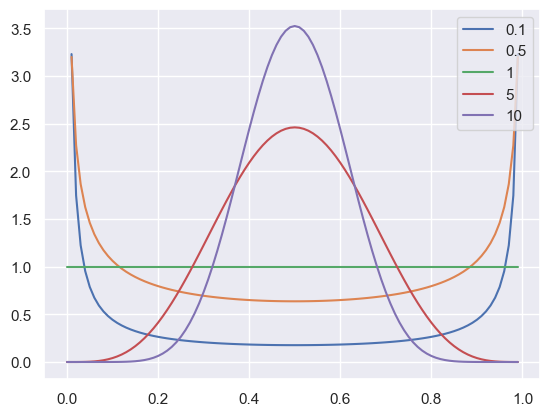

In [11]:
lam = [0.1, 0.5, 1, 5, 10]
f = np.arange(0, 1, 0.01)

for lam_i in lam:
    prob = (gamma(2 * lam_i) / gamma(lam_i)**2) * f**(lam_i - 1) * (1 - f)**(lam_i - 1)
    plt.plot(f, prob, label=f'{lam_i}')
plt.legend()
plt.show()

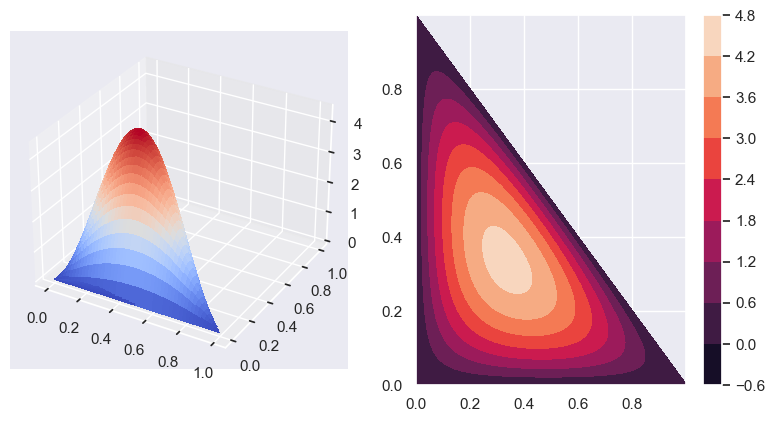

In [64]:
from matplotlib import cm

x = np.arange(0, 1, 0.001)

X, Y = np.meshgrid(x, x)
lam = 2

for i, x_i in enumerate(X):
    for j, y_j in enumerate(Y):
        if X[i, j] + Y[i , j] > 1 + 1e-3:
            X[i, j] = 0
            Y[i , j] = 0


Z = (gamma(3 * lam) / gamma(lam)**3) * X**(lam - 1) * Y**(lam - 1) * (1 - X - Y)**(lam - 1)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax = fig.add_subplot(1, 2, 2)
countour = ax.contourf(X, Y, Z)
fig.colorbar(countour, ax=ax)
plt.show()